In [15]:
import numpy as np
#from tardis import run_tardis
import pandas as pd
import matplotlib.pyplot as plt
import yaml
import astropy.units as u
import astropy
import math

In [2]:
def generate_powerlaw_grid(n, rho0, v0, t0, vgrid, test = False):
    vgrid_mids = vgrid - (vgrid[1] - vgrid[0])/2
    rhogrid = rho0*np.power(v0/vgrid_mids, n)
    #data = {'index': (np.linspace(0, vgrid.shape[0]-1, vgrid.shape[0]).astype(int)),
    #       'velocity (km/s)': vgrid,
    #       'density (g/cm^3)': rhogrid}
    #df = pd.DataFrame(data)
    if test:
        return rhogrid
    else:
        with open('power-density_n'+str(n)+'_t'+str(t0)+'_rho'+str(rho0)+'_v'+str(v0)+'.dat', 'w') as f:
            f.write('%f day\n' % t0)
            f.write('# index velocity (km/s) density (g/cm^3)\n')
            for i in range (vgrid.shape[0]):
                f.write('%i\t%.3f\t%.7e\n' % (i, vgrid[i], rhogrid[i]))
                
        with open('tardis_pow_cust_new.yml') as f:
            yob = yaml.load(f)
        yob['model']['structure']['filename'] = 'power-density_n'+str(n)+'_t'+str(t0)+'_rho'+str(rho0)+'_v'+str(v0)+'.dat'
        
        with open('tardis_pow_cust_new.yml', 'w') as f:
            yaml.dump(yob, f)

In [106]:
generate_powerlaw_grid(5, 2e-14, 11500, 1, np.linspace(11000,20000,20))

[py.warnings         ][WARNING]  /afs/mpa/data/csogeza/tardis/lib/python3.7/site-packages/ipykernel_launcher.py:18: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
 (warnings.py:110)


In [107]:
sim = run_tardis('tardis_pow_cust_new.yml')

[tardis.plasma.standard_plasmas][INFO   ]  Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:87)
[tardis.io.atom_data.util][INFO   ]  Atom Data kurucz_cd23_chianti_H_He.h5 not found in local path. Exists in TARDIS Data repo /afs/mpa/home/csogeza/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5 (util.py:35)
[py.warnings         ][WARNING]  /afs/mpa/data/csogeza/tardis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: PerformanceWarning: indexing past lexsort depth may impact performance.
  exec(code_obj, self.user_global_ns, self.user_ns)
 (warnings.py:110)
[tardis.io.atom_data.base][INFO   ]  Read Atom Data with UUID=6f7b09e887a311e7a06b246e96350010 and MD5=864f1753714343c41f99cb065710cace. (base.py:187)
[tardis.io.atom_data.base][INFO   ]  Non provided atomic data: synpp_refs, photoionization_data (base.py:193)
[tardis.simulation.base][INFO   ]  Starting iteration 1/20 (base.py:325)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.079

[tardis.simulation.base][INFO   ]  t_inner 9840.911 K -- next t_inner 9932.707 K (base.py:436)
[tardis.simulation.base][INFO   ]  Starting iteration 9/20 (base.py:325)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.07906e+43 erg / s Luminosity absorbed = 5.24009e+40 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:447)
[tardis.simulation.base][INFO   ]  Iteration converged 8/4 consecutive times. (base.py:228)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	             t_rad   next_t_rad         w    next_w
	Shell                                              
	0      9860.323470  9997.260806  0.402921  0.396677
	5      9766.564573  9912.839889  0.212321  0.207570
	10     9665.031751  9791.131748  0.146075  0.143919
	15     9549.020451  9655.967222  0.109966  0.109010

 (base.py:433)
[tardis.simulation.base][INFO   ]  t_inner 9932.707 K -- next t_inner 9841.219 K (base.py:436)
[tardis.simulation.base][INFO   ]  Starting iteration 10/20 (base.py:325)
[tar

[tardis.simulation.base][INFO   ]  Plasma stratification:
	             t_rad   next_t_rad         w    next_w
	Shell                                              
	0      9919.511770  9981.505282  0.394652  0.399678
	5      9797.707818  9871.754630  0.209305  0.210428
	10     9680.856358  9807.018848  0.144865  0.143076
	15     9570.169630  9657.522644  0.108893  0.108832

 (base.py:433)
[tardis.simulation.base][INFO   ]  t_inner 9930.361 K -- next t_inner 9842.450 K (base.py:436)
[tardis.simulation.base][INFO   ]  Starting iteration 18/20 (base.py:325)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.04025e+43 erg / s Luminosity absorbed = 5.18784e+40 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:447)
[tardis.simulation.base][INFO   ]  Iteration converged 17/4 consecutive times. (base.py:228)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	             t_rad   next_t_rad         w    next_w
	Shell                                              
	0     

In [47]:
sim2 = run_tardis('tardis_powertest_exact.yml')

[tardis.plasma.standard_plasmas][INFO   ]  Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:87)
[tardis.io.atom_data.util][INFO   ]  Atom Data kurucz_cd23_chianti_H_He.h5 not found in local path. Exists in TARDIS Data repo /afs/mpa/home/csogeza/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5 (util.py:35)
[py.warnings         ][WARNING]  /afs/mpa/data/csogeza/tardis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: PerformanceWarning: indexing past lexsort depth may impact performance.
  exec(code_obj, self.user_global_ns, self.user_ns)
 (warnings.py:110)
[tardis.io.atom_data.base][INFO   ]  Read Atom Data with UUID=6f7b09e887a311e7a06b246e96350010 and MD5=864f1753714343c41f99cb065710cace. (base.py:187)
[tardis.io.atom_data.base][INFO   ]  Non provided atomic data: synpp_refs, photoionization_data (base.py:193)
[tardis.simulation.base][INFO   ]  Starting iteration 1/20 (base.py:325)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.079

[tardis.simulation.base][INFO   ]  t_inner 9845.311 K -- next t_inner 9928.655 K (base.py:436)
[tardis.simulation.base][INFO   ]  Starting iteration 9/20 (base.py:325)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.07707e+43 erg / s Luminosity absorbed = 5.46051e+40 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:447)
[tardis.simulation.base][INFO   ]  Iteration converged 8/4 consecutive times. (base.py:228)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	             t_rad   next_t_rad         w    next_w
	Shell                                              
	0      9871.587308  9989.791592  0.404632  0.399154
	5      9759.561687  9887.666654  0.218578  0.214623
	10     9673.570980  9775.130711  0.151358  0.150242
	15     9585.231443  9658.054732  0.113890  0.113978

 (base.py:433)
[tardis.simulation.base][INFO   ]  t_inner 9928.655 K -- next t_inner 9846.278 K (base.py:436)
[tardis.simulation.base][INFO   ]  Starting iteration 10/20 (base.py:325)
[tar

[tardis.simulation.base][INFO   ]  Plasma stratification:
	             t_rad   next_t_rad         w    next_w
	Shell                                              
	0      9922.593992  9982.310319  0.396947  0.402162
	5      9831.342600  9913.078928  0.212257  0.213132
	10     9718.066528  9787.884707  0.148494  0.149664
	15     9607.361871  9659.523662  0.112534  0.114046

 (base.py:433)
[tardis.simulation.base][INFO   ]  t_inner 9930.894 K -- next t_inner 9842.016 K (base.py:436)
[tardis.simulation.base][INFO   ]  Starting iteration 18/20 (base.py:325)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.03986e+43 erg / s Luminosity absorbed = 5.30545e+40 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:447)
[tardis.simulation.base][INFO   ]  Iteration converged 17/4 consecutive times. (base.py:228)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	             t_rad   next_t_rad         w    next_w
	Shell                                              
	0     

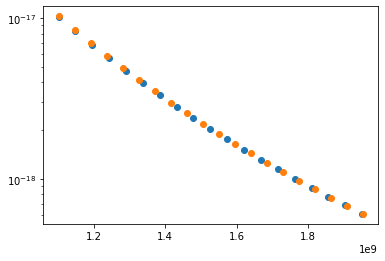

In [48]:
plt.scatter(sim.runner.v_inner_cgs, sim.model.density)
plt.scatter(sim2.runner.v_inner_cgs, sim2.model.density)
plt.yscale('log')

In [111]:
sim.model

AttributeError: 'MontecarloRunner' object has no attribute 'r_inner'

In [116]:
R.value/1e5

array([1.23552000e+10, 1.28872419e+10, 1.34192837e+10, 1.39513267e+10,
       1.44833686e+10, 1.50154105e+10, 1.55474523e+10, 1.60794942e+10,
       1.66115372e+10, 1.71435791e+10, 1.76756209e+10, 1.82076628e+10,
       1.87397058e+10, 1.92717477e+10, 1.98037895e+10, 2.03358314e+10,
       2.08678733e+10, 2.13999163e+10, 2.19319581e+10])

In [112]:
n = sim.plasma.electron_densities
R = sim.model.r_inner 
dR = np.ediff1d(R).value
(np.sum(np.multiply(dR,n[:-1]))+(dR[-1]*n[18]))*astropy.constants.sigma_T.value*1e4

9.29816779879082e-05

In [49]:
sim.plasma.electron_densities

0     436771.416292
1     357029.946114
2     294779.454648
3     245995.737980
4     205745.557279
5     172896.323410
6     146776.822592
7     125620.351976
8     107377.953949
9      92136.515212
10     79390.085322
11     68919.296626
12     60436.368178
13     52610.922835
14     45836.493456
15     40316.943122
16     35366.145509
17     31286.407071
18     27762.456159
dtype: float64

In [60]:
sim.model.r_inner 

<Quantity [1.23552000e+15, 1.28872419e+15, 1.34192837e+15, 1.39513267e+15,
           1.44833686e+15, 1.50154105e+15, 1.55474523e+15, 1.60794942e+15,
           1.66115372e+15, 1.71435791e+15, 1.76756209e+15, 1.82076628e+15,
           1.87397058e+15, 1.92717477e+15, 1.98037895e+15, 2.03358314e+15,
           2.08678733e+15, 2.13999163e+15, 2.19319581e+15] cm>

In [58]:
sim.model.t_inner

<Quantity 16000. K>

In [35]:
generate_powerlaw_grid(5, 2e-14, 11500, 1, np.linspace(9000,22500,10))

In [11]:
def generate_broken_powerlaw_grid(n1, n2, v_th, rho0, v0, t0, vgrid, test = False):
    
    # Is this supposed to be continuous? I guess so...
    rhogrid = np.zeros(vgrid.shape)
    cond = (vgrid <= v_th)
    rhogrid[cond] = rho0 * np.power(v0 / vgrid[cond], n1)
    rhogrid[~cond] = rho0 * np.power(v0 / v_th, n1) * np.power(v_th / vgrid[~cond], n2)  
    
    if test:
        return rhogrid
    else:
        with open('power-density-n1_'+str(n1)+'-n2_'+str(n2)+'-t'+str(t0)+'-rho'+str(rho0)+'_v'
                  +str(v0)+'_vth'+str(v_th)+'.dat', 'w') as f:
            f.write('%f day\n' % t0)
            f.write('# index velocity (km/s) density (g/cm^3)\n')
            for i in range (vgrid.shape[0]):
                f.write('%i\t%.3f\t%.7e\n' % (i, vgrid[i], rhogrid[i]))

In [6]:
rg = generate_broken_powerlaw_grid(5, 10, 12000, 2e-14, 11500, 1, np.linspace(9000,22500,1000), test=True)

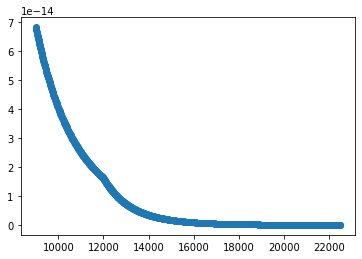

In [7]:
plt.scatter(np.linspace(9000,22500,1000),rg)

In [39]:
generate_broken_powerlaw_grid(3, 5, 12000, 2e-10, 11500, 1, np.linspace(9000,22500,15))

In [40]:
sim = run_tardis('tardis_custom_broken_pl.yml')

[tardis.plasma.standard_plasmas][INFO   ]  Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:87)
[tardis.io.atom_data.util][INFO   ]  Atom Data kurucz_cd23_chianti_H_He.h5 not found in local path. Exists in TARDIS Data repo /afs/mpa/home/csogeza/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5 (util.py:35)
[py.warnings         ][WARNING]  /afs/mpa/data/csogeza/tardis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: PerformanceWarning: indexing past lexsort depth may impact performance.
  exec(code_obj, self.user_global_ns, self.user_ns)
 (warnings.py:110)
[tardis.io.atom_data.base][INFO   ]  Read Atom Data with UUID=6f7b09e887a311e7a06b246e96350010 and MD5=864f1753714343c41f99cb065710cace. (base.py:187)
[tardis.io.atom_data.base][INFO   ]  Non provided atomic data: synpp_refs, photoionization_data (base.py:193)
[tardis.simulation.base][INFO   ]  Starting iteration 1/20 (base.py:325)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 7.002

[tardis.simulation.base][INFO   ]  t_inner 12509.040 K -- next t_inner 9810.612 K (base.py:436)
[tardis.simulation.base][INFO   ]  Starting iteration 11/20 (base.py:325)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 6.32245e+42 erg / s Luminosity absorbed = 3.57677e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:447)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      12636.173395  10923.334729  0.528375  0.368029
	5      13239.418334  12336.516803  0.106795  0.055819

 (base.py:433)
[tardis.simulation.base][INFO   ]  t_inner 9810.612 K -- next t_inner 12698.666 K (base.py:436)
[tardis.simulation.base][INFO   ]  Starting iteration 12/20 (base.py:325)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.82367e+43 erg / s Luminosity absorbed = 9.63663e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:447)
[tardis.simulati

In [3]:
def plot_spectrum(sim):
    spectrum = sim.runner.spectrum
    spectrum_virtual = sim.runner.spectrum_virtual
    spectrum_integrated = sim.runner.spectrum_integrated

    plt.plot(spectrum.wavelength, spectrum.luminosity_density_lambda, label='normal packets')
    plt.plot(spectrum.wavelength, spectrum_virtual.luminosity_density_lambda, label='virtual packets')
    plt.plot(spectrum.wavelength, spectrum_integrated.luminosity_density_lambda, label='formal integral')

    plt.xlabel('Wavelength [$\AA$]')
    plt.ylabel('Luminosity [erg/s/$\AA$]')
    plt.legend()
    plt.xlim(3000,9000)
    plt.ylim(-0.5e39,6e39)
    
def get_spectra(sim):
    spectrum = sim.runner.spectrum
    spectrum_virtual = sim.runner.spectrum_virtual
    spectrum_integrated = sim.runner.spectrum_integrated
    
    return spectrum, spectrum_virtual, spectrum_integrated

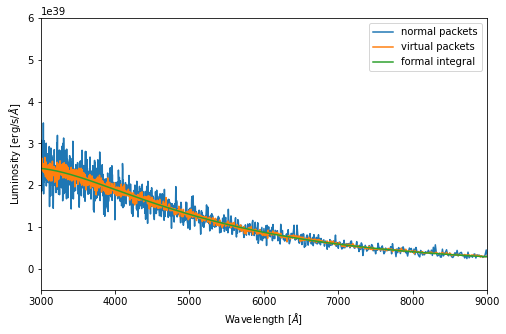

In [35]:
plt.figure(figsize=(8,5))  # n1 = 5 n2 = 10 rho = 2e-14
plot_spectrum(sim)

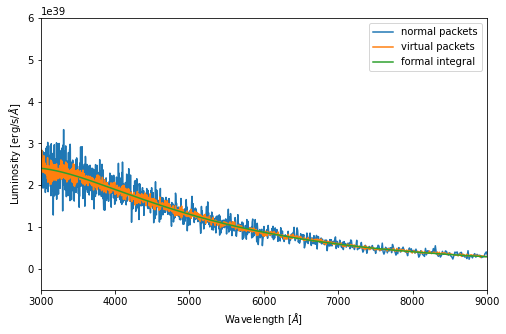

In [38]:
plt.figure(figsize=(8,5))  # n1 = 5 n2 = 5 rho = 2e-14
plot_spectrum(sim)

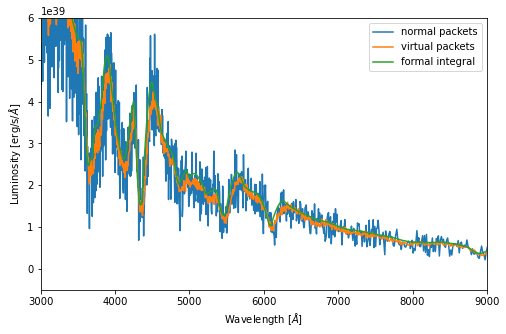

In [41]:
plt.figure(figsize=(8,5)) # n1 = 3 n2 = 5 rho = 2e-10
plot_spectrum(sim)

# -------------------------------------------------------------------------

### So as a first step we have to determine the $\rho_{ph}$, then calculate the $v_{inner}$

We have two equations for these (or three, depending on the relation between the $v_{ph}$ and the $v_{th}$

In [5]:
def get_rhoph(n1, n2, v_ph, v_th, mu_e, t):
    v_ph = (v_ph * u.kilometer /(1 * u.s)).to("cm / s")
    v_th = (v_th * u.kilometer /(1 * u.s)).to("cm / s")
    mu_e = mu_e * u.gram
    sig_e = astropy.constants.sigma_T.to("cm2")
    t = (t * u.day).to(u.s)
	
	
    if v_ph < v_th:
        return 2/3 * mu_e/(sig_e * t * v_ph) / (1/(n1-1) +
		(v_ph / v_th)**(n1-1) * (1/(n2-1) - 1/(n1-1)))
    else:
        return 2/3 * mu_e * (n2 - 1) / (sig_e * t * v_ph)



def get_vinner(n1, n2, v_ph, v_th, mu_e, tau, rho_ph, t):
    
    v_ph = (v_ph * u.kilometer / (1 * u.s)).to("cm / s")
    v_th = (v_th * u.kilometer / (1 * u.s)).to("cm / s")
    mu_e = mu_e * u.gram
    sig_e = astropy.constants.sigma_T.to("cm2")
    t = (t * u.day).to(u.s)
    
    if v_ph < v_th:
        first_t = tau * mu_e * (n1 - 1) / (rho_ph * sig_e * t * v_ph) / v_ph**(n1 - 1)
        second_t = 1 / v_th**(n1 - 1) * ( (n1 - 1) / (n2 - 1) - 1)
        
    else:
        first_t = tau * mu_e * (n1 - 1) / (rho_ph * sig_e * t) * v_th**(n2 - n1) / v_ph**(n2)
        second_t = 1 / v_th**(n1 - 1) * ( (n1 - 1) / (n2 - 1) - 1)
        
    try:
        return (np.power(first_t - second_t, 1 / (1 - n1))).to("km / s")

    except astropy.units.core.UnitConversionError:
        return (np.power(first_t.value - second_t.value, 1 / (1 - n1)) * u.cm / (1 * u.s)).to("km / s")
    
    # Astropy seems not to be able to raise the cm^n / s^n to the 1/n th power if n is a float


	
def calc_mu(X, Y):

    return 1.6735575e-24 * (X + 1/4 * Y)**-1

def calc_mu_mod(X, Y, ZHeEff):

    return 1.6735575e-24 * (X + ZHeEff * 1/4 * Y)**-1

### Setting the mu_e to something else messes up the result; another yaml file thingy?

In [168]:
np.ediff1d(vg2)

array([182.08086837, 187.68477428, 193.46115169, 199.41530876,
       205.55271703, 211.87901641, 218.40002041, 225.12172146,
       232.05029641, 239.19211223, 246.55373184, 254.14192013,
       261.96365022, 270.02610983, 278.33670788, 286.90308136,
       295.73310225, 304.83488484, 314.21679315, 323.8874486 ,
       333.85573798, 344.13082156, 354.72214156, 365.63943079,
       376.89272162, 388.49235516, 400.44899082, 412.77361605,
       425.47755647])

In [179]:
np.power(10,np.log10(vg2)[1:] - np.ediff1d(np.log10(vg2)))

array([ 5916.13121085,  6098.21207922,  6285.8968535 ,  6479.35800519,
        6678.77331395,  6884.32603098,  7096.20504738,  7314.60506779,
        7539.72678925,  7771.77708566,  8010.96919789,  8257.52292973,
        8511.66484986,  8773.62850008,  9043.6546099 ,  9321.99131779,
        9608.89439914,  9904.6275014 , 10209.46238624, 10523.67917939,
       10847.56662799, 11181.42236596, 11525.55318752, 11880.27532909,
       12245.91475988, 12622.8074815 , 13011.29983666, 13411.74882748,
       13824.52244353])

In [198]:
lsq = np.logspace(math.log(min(vg2),3), math.log(max(vg2),3), 30)

In [226]:
lsq_mds = lsq[1:] - np.ediff1d(lsq)*0.77

In [227]:
lsq_mds

array([8.17202202e+07, 8.70806218e+07, 9.27926366e+07, 9.88793285e+07,
       1.05365274e+08, 1.12276663e+08, 1.19641400e+08, 1.27489225e+08,
       1.35851824e+08, 1.44762964e+08, 1.54258627e+08, 1.64377153e+08,
       1.75159399e+08, 1.86648903e+08, 1.98892055e+08, 2.11938291e+08,
       2.25840289e+08, 2.40654182e+08, 2.56439787e+08, 2.73260841e+08,
       2.91185265e+08, 3.10285433e+08, 3.30638468e+08, 3.52326552e+08,
       3.75437256e+08, 4.00063896e+08, 4.26305910e+08, 4.54269257e+08,
       4.84066847e+08])

In [213]:
vgm2

array([ 5864.67646604,  5967.58595565,  6073.87059642,  6187.12693107,
        6307.81226475,  6436.41389937,  6573.45110117,  6719.47719744,
        6875.08181073,  7040.89323962,  7217.58099564,  7405.85850664,
        7606.48599748,  7820.27355959,  8048.08442202,  8290.83843693,
        8549.51579377,  8825.16097711,  9118.88698399,  9431.87981802,
        9765.40327817, 10120.80406176, 10499.51720211, 10903.07186294,
       11333.09751276, 11791.33050435, 12279.62108577, 12799.94087132,
       13354.39080242, 13945.20963083])

In [214]:
(lsq_mds - min(lsq)) / (max(lsq) - (min(lsq))) * (14250 - min(vg2)) + min(vg2)

array([ 5939.80039346,  6044.2624526 ,  6155.57665418,  6274.19246145,
        6400.58881998,  6535.27609159,  6678.79811504,  6831.73440196,
        6994.70247679,  7168.36037021,  7353.40927612,  7550.59638295,
        7760.71789058,  7984.62222532,  8223.21346558,  8477.45499242,
        8748.37337946,  9037.06253793,  9344.6881337 ,  9672.49229399,
       10021.79862279, 10394.01754529, 10790.65200292, 11213.30352188,
       11663.67867977, 12143.59599638, 12654.99327652, 13199.93543443,
       13780.62283148])

In [268]:
def generate_broken_powerlaw_grid_vph(n1, n2, v_th, v_ph, t0, mu_e, tau, vgrid_n, v_grid_max,
                                      templ_file = 'tardis_pow_cust_new_H.yml', outp_yml = 'tardis_broken_pow_cust_new.yml'):
    
    rho_ph = get_rhoph(n1, n2, v_ph, v_th, mu_e, t0)
    v_inner = get_vinner(n1, n2, v_ph, v_th, mu_e, tau, rho_ph, t0)
    
    # The density is in g/cm3, while the velocity is in km/s. From here on the units
    # will be omitted, as they do not matter in the calculations
    
    #vgrid = np.logspace(math.log(v_inner.value,3), math.log(v_grid_max,3), vgrid_n)
   #vgrid = ((vgrid - min(vgrid)) / (max(vgrid) - min(vgrid))) * (v_grid_max - v_inner.value) + v_inner.value

    vgrid = np.logspace(np.log10(v_inner.value), np.log10(v_grid_max), vgrid_n)
    #vgrid = np.linspace(v_inner.value, v_grid_max, vgrid_n)
     
    #vgrid_mids = vgrid - (vgrid[1] - vgrid[0]) / 2
    
    vgrid_mids = np.zeros(vgrid.shape)
    vgrid_mids[0] = np.power(10,np.log10(vg2)[0] - np.ediff1d(np.log10(vg2))[0]*0.77)
    vgrid_mids[1:] = np.power(10,np.log10(vg2)[1:] - np.ediff1d(np.log10(vg2))*0.77)
    
    
    
    #vg_diffs = np.ediff1d(vgrid)
    #vgrid_mids[0] = vgrid[0] - vg_diffs[0]/2
    #vgrid_mids[1:] = vgrid[1:] - vg_diffs/2
    
#    vgrid_mids = vgrid
    rhogrid = np.zeros(vgrid.shape)
    cond = (vgrid_mids <= v_th)

    if v_ph < v_th:
        
        rhogrid[cond] = rho_ph.value * np.power(v_ph / vgrid_mids[cond], n1)
        rhogrid[~cond] = rho_ph.value * np.power(v_ph / v_th, n1) * np.power(v_th / vgrid_mids[~cond], n2)  
   
    else:
        
        rhogrid[cond] = rho_ph.value * np.power(v_ph / v_th, n2) * np.power(v_th / vgrid_mids[cond], n1)
        rhogrid[~cond] = rho_ph.value * np.power(v_ph / vgrid_mids[~cond], n2)
    
    return vgrid, vgrid_mids, rhogrid
    # Printing to a file with a custom nam ebased on the parameters of the model
    
#    with open('power-density-n1_'+str(n1)+'-n2_'+str(n2)+'-t'+str(t0)+'-vph_'+str(v_ph)+
#                  '-vth_'+str(v_th)+'-mu_e_'+str(mu_e)+'.dat', 'w') as f:
#        f.write('%f day\n' % t0)
#        f.write('# index velocity (km/s) density (g/cm^3)\n')
#        for i in range (vgrid.shape[0]):
#            f.write('%i\t%.3f\t%.7e\n' % (i, vgrid[i], rhogrid[i]))
#                
#    with open(templ_file) as f:
#        yob = yaml.load(f)
#    yob['model']['structure']['filename'] = 'power-density-n1_'+str(n1)+'-n2_'+str(n2)+\
#                '-t'+str(t0)+'-vph_'+str(v_ph)+'-vth_'+str(v_th)+'-mu_e_'+str(mu_e)+'.dat'
#    yob['model']['structure']['v_inner_boundary'] = str(round(v_inner.value,3))+' km/s'
#    #yob['model']['abundances']['H'] = str(X)
#    #yob['model']['abundances']['He'] = str(Y)
#    yob['supernova']['time_explosion'] = str(round(t0,3))+' day'
#        
#    with open(outp_yml, 'w') as f:
#        yaml.dump(yob, f)

In [ ]:
R = pd.read_hdf('TARDIS_start/Results/'+ sdr1 + fn1[j], key="r_inner")
R_o = pd.read_hdf('TARDIS_start/Results/'+ sdr1 + fn1[j], key="r_outer")
v = R / (86400 * 18.5355) / 1e5  # Hardcoded value; day since explosion
ion_de = pd.read_hdf('TARDIS_start/Results/'+ sdr1 + fn1[j], key="ion_density")

R2 = pd.read_hdf('TARDIS_start/Results/'+ sdr2 + fn2[j], key="r_inner")
R2_o = pd.read_hdf('TARDIS_start/Results/'+ sdr2 + fn2[j], key="r_outer")
v2 = R2 / (86400 * 18.5355) / 1e5  # Hardcoded value; day since explosion
ion_de2 = pd.read_hdf('TARDIS_start/Results/'+ sdr2 + fn2[j], key="ion_density")

In [253]:
[i for i innp.ediff1d(vg2)

array([102.90948961, 109.65979194, 116.85287735, 124.51779001,
       132.68547922, 141.38892438, 150.66326817, 160.54595842,
       171.07689935, 182.29861269, 194.25640933, 206.99857234,
       220.57655188, 235.04517297, 250.46285684, 266.89185685,
       284.39850982, 303.05350394, 322.93216411, 344.11475619,
       366.68681099, 390.73946972, 416.36985193, 443.6814477 ,
       472.78453547, 503.79662738, 536.84294371, 572.05691849,
       609.58073833])

In [272]:
np.diff(vg2)

array([182.08086837, 187.68477428, 193.46115169, 199.41530876,
       205.55271703, 211.87901641, 218.40002041, 225.12172146,
       232.05029641, 239.19211223, 246.55373184, 254.14192013,
       261.96365022, 270.02610983, 278.33670788, 286.90308136,
       295.73310225, 304.83488484, 314.21679315, 323.8874486 ,
       333.85573798, 344.13082156, 354.72214156, 365.63943079,
       376.89272162, 388.49235516, 400.44899082, 412.77361605,
       425.47755647])

In [273]:
np.ediff1d(vg2)

array([182.08086837, 187.68477428, 193.46115169, 199.41530876,
       205.55271703, 211.87901641, 218.40002041, 225.12172146,
       232.05029641, 239.19211223, 246.55373184, 254.14192013,
       261.96365022, 270.02610983, 278.33670788, 286.90308136,
       295.73310225, 304.83488484, 314.21679315, 323.8874486 ,
       333.85573798, 344.13082156, 354.72214156, 365.63943079,
       376.89272162, 388.49235516, 400.44899082, 412.77361605,
       425.47755647])

In [7]:
mu_e = calc_mu_mod(0.548822580264,0.425148381550787,0.5470185894631937)

In [258]:
vg1, vgm1, rg1 = generate_broken_powerlaw_grid_vph(10, 14, 6750, 7794, 18.5355, mu_e, 18.54, 30, 14250)

(5700.0, 10000.0)

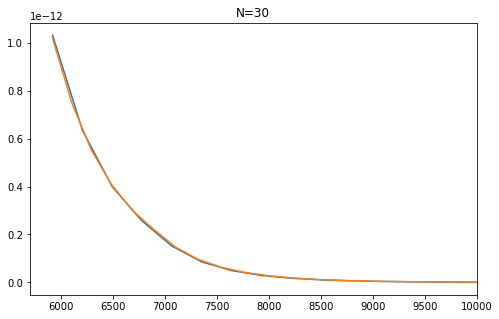

In [275]:
f = plt.figure(figsize=(8,5))
plt.title('N=30',fontsize=12)
plt.plot(vg1, rg1)
plt.plot(vg2, rg2)
plt.xlim(5700,10000)

In [269]:
vg2, vgm2, rg2 = generate_broken_powerlaw_grid_vph(10, 14, 6750, 7794, 18.5355, mu_e, 18.54, 30, 14250)

In [264]:
vg2

array([ 5916.13121085,  6098.21207922,  6285.8968535 ,  6479.35800519,
        6678.77331395,  6884.32603098,  7096.20504738,  7314.60506779,
        7539.72678925,  7771.77708566,  8010.96919789,  8257.52292973,
        8511.66484986,  8773.62850008,  9043.6546099 ,  9321.99131779,
        9608.89439914,  9904.6275014 , 10209.46238624, 10523.67917939,
       10847.56662799, 11181.42236596, 11525.55318752, 11880.27532909,
       12245.91475988, 12622.8074815 , 13011.29983666, 13411.74882748,
       13824.52244353, 14250.        ])

(0.0, 1e-12)

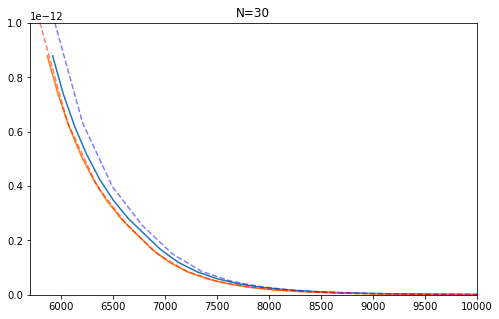

In [249]:
f = plt.figure(figsize=(8,5))
plt.title('N=30',fontsize=12)
plt.plot(vg2, rg2)
plt.plot(vgm2, rg2)

plt.plot(vg1, rg1, 'b--', alpha=0.5)
plt.plot(vgm1, rg1, 'r--', alpha=0.5)
plt.xlim(5700,10000)
plt.ylim(0,1e-12)

(5700.0, 10000.0)

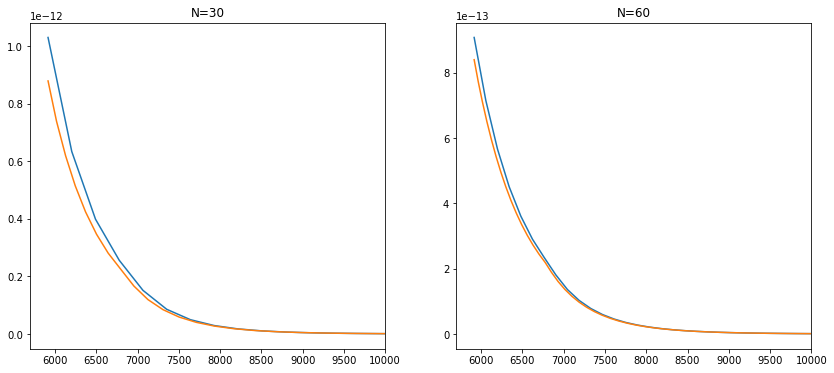

In [89]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(1,2,1)
plt.title('N=30',fontsize=12)
plt.plot(vg1_30, rg1_30)
#plt.plot(vg15, rg15)
plt.plot(vg2_30, rg2_30)
plt.xlim(5700,10000)

ax = f.add_subplot(1,2,2)
plt.title('N=60',fontsize=12)
plt.plot(vg1_60, rg1_60)
#plt.plot(vg15, rg15)
plt.plot(vg2_60, rg2_60)
plt.xlim(5700,10000)

In [42]:
rgo = generate_broken_powerlaw_grid_vph(9, 13, 15000, 12000, 9, 1.6735575e-24, 20, 30, 20000, templ_file='tardis_custom.yml')

In [267]:
sim = run_tardis('tardis_broken_pow_cust_new.yml')

[tardis.plasma.standard_plasmas][INFO   ]  Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:87)
[tardis.io.atom_data.util][INFO   ]  Atom Data kurucz_cd23_chianti_H_He.h5 not found in local path. Exists in TARDIS Data repo /afs/mpa/home/csogeza/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5 (util.py:35)
[py.warnings         ][WARNING]  /afs/mpa/data/csogeza/tardis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: PerformanceWarning: indexing past lexsort depth may impact performance.
  exec(code_obj, self.user_global_ns, self.user_ns)
 (warnings.py:110)
[tardis.io.atom_data.base][INFO   ]  Read Atom Data with UUID=6f7b09e887a311e7a06b246e96350010 and MD5=864f1753714343c41f99cb065710cace. (base.py:187)
[tardis.io.atom_data.base][INFO   ]  Non provided atomic data: synpp_refs, photoionization_data (base.py:193)
[tardis.simulation.base][INFO   ]  Starting iteration 1/20 (base.py:325)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 7.698

[tardis.simulation.base][INFO   ]  t_inner 13934.359 K -- next t_inner 52934.914 K (base.py:436)
[tardis.simulation.base][INFO   ]  Starting iteration 4/20 (base.py:325)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.53970e+44 erg / s Luminosity absorbed = 1.89615e+45 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:447)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      13959.679117  52543.283843  0.908052  0.946302
	5      13967.217491  49578.680838  0.617959  0.811337
	10     13902.014234  48461.595752  0.444173  0.614463
	15     13902.618602  48198.200282  0.313136  0.452969
	20     13679.087805  47597.749475  0.238305  0.339288
	25     13614.062178  47132.739626  0.177195  0.262388
	30     13503.393783  46552.863520  0.138808  0.204333
	35     13297.934905  46051.918488  0.110700  0.162746
	40     13570.938348  45784.645130  0.079020  0

[tardis.simulation.base][INFO   ]  t_inner 53131.569 K -- next t_inner 14050.216 K (base.py:436)
[tardis.simulation.base][INFO   ]  Starting iteration 7/20 (base.py:325)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 7.71182e+41 erg / s Luminosity absorbed = 9.40480e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:447)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      52792.323331  14164.880041  0.943637  0.889354
	5      51490.108593  14041.995758  0.690616  0.628010
	10     50060.854204  13879.818583  0.539754  0.458430
	15     48894.581596  13849.569880  0.420342  0.327173
	20     47946.183898  13697.172057  0.334140  0.250723
	25     47541.623803  13522.246540  0.256239  0.192680
	30     46548.422065  13508.964601  0.207256  0.146275
	35     46428.384589  13584.539849  0.158145  0.108872
	40     45751.895379  13383.652733  0.127279  0

[tardis.simulation.base][INFO   ]  t_inner 14162.363 K -- next t_inner 51688.847 K (base.py:436)
[tardis.simulation.base][INFO   ]  Starting iteration 10/20 (base.py:325)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.40187e+44 erg / s Luminosity absorbed = 1.72364e+45 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:447)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      14159.739655  51073.750433  0.923865  0.966453
	5      14172.175304  48597.696922  0.622981  0.802289
	10     14260.099871  47021.132867  0.424158  0.633178
	15     14101.594545  46041.726390  0.322496  0.501770
	20     13986.316422  45272.972104  0.243201  0.388130
	25     13880.550036  44810.633700  0.181060  0.294056
	30     13802.597220  44200.498220  0.139372  0.232813
	35     13724.471535  44790.240905  0.107082  0.164737
	40     13594.261491  42707.606007  0.085313  

[tardis.simulation.base][INFO   ]  t_inner 51867.599 K -- next t_inner 14050.071 K (base.py:436)
[tardis.simulation.base][INFO   ]  Starting iteration 13/20 (base.py:325)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 7.69079e+41 erg / s Luminosity absorbed = 9.40717e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:447)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      51593.695002  14076.903035  0.938071  0.906321
	5      50229.626302  14153.565003  0.709718  0.610088
	10     48625.911248  14158.958838  0.560770  0.416388
	15     47671.289320  13858.347612  0.436307  0.322836
	20     46849.901148  13923.859628  0.337396  0.232688
	25     46429.168648  13921.878496  0.259903  0.168091
	30     45903.777025  13681.503770  0.203875  0.138063
	35     45651.665155  13746.039352  0.159172  0.102019
	40     45040.273478  13735.360206  0.128758  

[tardis.simulation.base][INFO   ]  t_inner 14185.901 K -- next t_inner 51586.231 K (base.py:436)
[tardis.simulation.base][INFO   ]  Starting iteration 16/20 (base.py:325)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.37748e+44 erg / s Luminosity absorbed = 1.71109e+45 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:447)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      14126.309216  50949.832265  0.934807  0.967598
	5      14254.204988  48336.009470  0.613038  0.807289
	10     14072.029303  46661.122648  0.449059  0.653427
	15     14027.798907  45317.087500  0.329262  0.535533
	20     14008.049542  44866.544505  0.235281  0.399683
	25     13757.075024  44530.956382  0.185809  0.296983
	30     13547.130568  43859.422822  0.150051  0.238826
	35     13569.293607  43299.371569  0.113526  0.191654
	40     13385.975763  43300.129596  0.093340  

[tardis.simulation.base][INFO   ]  t_inner 51035.331 K -- next t_inner 14385.124 K (base.py:436)
[tardis.simulation.base][INFO   ]  Starting iteration 19/20 (base.py:325)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 8.31373e+41 erg / s Luminosity absorbed = 1.03512e+43 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:447)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      50883.721834  14574.326604  0.935217  0.872460
	5      49527.922088  14596.379734  0.711250  0.581272
	10     47965.111582  14595.610039  0.568136  0.411045
	15     46575.423134  14482.696131  0.454636  0.299279
	20     45518.209388  14321.543800  0.363859  0.225011
	25     44853.275353  14378.805116  0.276921  0.161969
	30     44660.547750  14079.156085  0.209987  0.134719
	35     43612.101433  14110.775154  0.179729  0.102828
	40     42905.994149  14244.723879  0.149029  

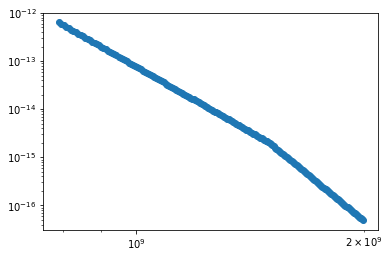

In [268]:
plt.scatter(sim.runner.v_inner_cgs, sim.model.density)
plt.yscale('log')
plt.xscale('log')

In [269]:
n = sim.plasma.electron_densities  # Altering the mu_e messes this up... 
R = sim.model.r_inner 
dR = np.ediff1d(R).value
(np.sum(np.multiply(dR,n[:-1])) + np.array(dR)[-1]*np.array(n)[-1])*astropy.constants.sigma_T.value*1e4

19.991251405650317

In [270]:
n = sim.plasma.electron_densities
R = sim.runner.v_inner_cgs * 86400 * 9  # this is calculated by the velocities, thus the time has to be specified
dR = np.ediff1d(R)
(np.sum(dR[0]*n))*astropy.constants.sigma_T.value*1e4

19.991150195179063

In [271]:
(np.sum(np.array(dR[0]*n)[np.array(sim.runner.v_inner_cgs) > 12000 * 1e5]))*astropy.constants.sigma_T.value*1e4

0.648286567568539

In [185]:
sim.runner.v_inner_cgs

array([8.2739670e+08, 8.6783130e+08, 9.0826590e+08, 9.4870050e+08,
       9.8913510e+08, 1.0295697e+09, 1.0700042e+09, 1.1104388e+09,
       1.1508734e+09, 1.1913080e+09, 1.2317426e+09, 1.2721772e+09,
       1.3126118e+09, 1.3530464e+09, 1.3934810e+09, 1.4339156e+09,
       1.4743502e+09, 1.5147848e+09, 1.5552194e+09, 1.5956540e+09,
       1.6360886e+09, 1.6765232e+09, 1.7169578e+09, 1.7573924e+09,
       1.7978270e+09, 1.8382616e+09, 1.8786962e+09, 1.9191308e+09,
       1.9595654e+09])

In [176]:
np.array(dR[0]*n)[np.array(sim.runner.v_inner_cgs) > 11000 * 1e5]

array([2.13596763e+23, 1.54272581e+23, 1.12697321e+23, 8.32025568e+22,
       5.13281170e+22, 3.09659984e+22, 1.89729531e+22, 1.17952068e+22,
       7.43416462e+21, 4.74657924e+21, 3.06792324e+21, 2.00604715e+21,
       1.32620389e+21, 8.85954266e+20, 5.97752234e+20, 4.07130029e+20,
       2.79804546e+20, 1.93957694e+20, 1.35557260e+20, 9.54873826e+19])